## **Оценка и оптимизация юнит-экономики для маркетплейса**

---

**MarketPro** — это маркетплейс, специализирующийся на продаже различных товаров через свою веб-платформу. В его бизнес-модели присутствуют три основных источника дохода:
- **комиссия с продавцов** за каждую продажу;
- **плата за продвижение товаров** на платформе;
- **абонентская плата за подписку** на расширенные функции для продавцов.

Несмотря на рост числа пользователей и продавцов на платформе, компания сталкивается с уменьшением рентабельности и ростом затрат на привлечение клиентов.

**Задача** – оценить текущие показатели юнит-экономики и предложить оптимизационные меры.



## Цель анализа

Опираясь на информацию установленную как:
- **"Исходные данные"**,
- **"Дополнительная информация"**,
- **"Табличные данные"** из предоставленного обновляемого файла

Провести расчеты и определить:

- **1)** Исчислить метрики по полученным сведениям;

- **2)** Провести расчёты ключевых показателей юнит-экономики для покупателей и продавцов (CAC, LTV и ROI), где:

 - **CAC** (Customer Acquisition Cost) – стоимость привлечения клиента (расходы делим на количество);
 - **LTV** (Lifetime Value) – пожизненная ценность клиента;
 - **ROI** (Return on Investment) – возврат инвестиций.

- **3)** Определить проблемные зоны в модели бизнеса;
- **4)**  Предложить планы по оптимизации CAC и увеличению LTV.

# Раздел 1: Получение данных для анализа

## 1 . Сведения для анализа данных:

**Исходные данные помимо данных таблицы:**
- 1) стоимость подписки составляет 3 тысячи рублей в месяц;
- 2) средний доход с одного покупателя составляет 2 тысячи рублей;
- 3) средняя продолжительность взаимодействия для покупателей (в месяцах) — 24 месяца;
- 4) средняя продолжительность взаимодействия для продавцов (в месяцах) — 18 месяцев


**Дополнительная информация: (см.п.1 Раздел 1)**

   - 1) маркетинговые расходы на привлечение покупателей: 3 млн рублей в месяц
   - 2) средний объем привлекаемых покупателей: 2000 человек в месяц
   - 3) средний объем привлекаемых продавцов: 500 человек в месяц
   - 4) операционные расходы на поддержание платформы: 1,5 млн рублей в месяц
   - 5) расходы на обслуживание каждого продавца: 1000 рублей в месяц
   - 6) удержание покупателей: 20%
   - 7) удержание продавцов: 40%

## 2 . Получение источника информации

In [ ]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 2.1. Получение информации из табличных данных  о ПРОДАВЦАХ

In [ ]:
# Получаем информацию из предоставленных таблиц о ПРОДАВЦАХ
# Пути к файлам на Google Диске
seller_data_path = '/content/drive/MyDrive/ПОРТФОЛИО/портфолио Метрики/Юнит_экономика Маркетплейса/seller_data.csv'                          # Таблица по продавцам
sellers_cohort_data_path = '/content/drive/MyDrive/ПОРТФОЛИО/портфолио Метрики/Юнит_экономика Маркетплейса/sellers_cohort_analysis_data.csv' # Данные по продавцам для построения когорт

# Загружаем данные из файлов
seller_data = pd.read_csv(seller_data_path)                    # Данные продавцов
sellers_cohort_data = pd.read_csv(sellers_cohort_data_path)    # Когортный анализ продавцов

# Просмотр первых строк каждой таблицы
print("Таблица seller_data (Продавцы):")
print(seller_data.head())

print("\nТаблица sellers_cohort_analysis_data (Когортный анализ продавцов):")
print(sellers_cohort_data.head())

# Проверяем уникальные идентификаторы
print("\nПроверка уникальности идентификаторов:")
print("seller_data Seller_ID уникальных:", seller_data['Seller_ID'].nunique())
print("sellers_cohort_analysis_data seller_id уникальных:", sellers_cohort_data['seller_id'].nunique())

# Приводим названия столбцов для объединения
sellers_cohort_data.rename(columns={'seller_id': 'Seller_ID'}, inplace=True)

# Объединение таблиц для продавцов (seller_data + sellers_cohort_analysis_data)
seller_full_data = pd.merge(seller_data, sellers_cohort_data, on='Seller_ID', how='left')

# Перезапишем на df что бы сохранить старый код
df = seller_full_data

# Просмотр структуры объединенных данных о продавцах
print("\nОбъединенные данные о продавцах в файле df:")
print(df.head())

# Теперь df используется для анализа продавцов


Таблица seller_data (Продавцы):
   Seller_ID  Order_Value  Commission_Rate  Promotion_Used  Subscription  \
0          1  2248.357077         0.086699            True         False   
1          2  1930.867849         0.084183            True          True   
2          3  2323.844269         0.105457            True         False   
3          4  2761.514928         0.108259            True         False   
4          5  1882.923313         0.081263           False         False   

   Promotion_Income  Subscription_Income  
0              5000                    0  
1              5000                 3000  
2              5000                    0  
3              5000                    0  
4                 0                    0  

Таблица sellers_cohort_analysis_data (Когортный анализ продавцов):
   seller_id registration_date  activity_1_month  activity_3_month  \
0          1        2021-03-23                 1                 0   
1          2        2022-11-30               

In [ ]:
# Проверим первые 5 строк для общего понимания структуры данных с ПРОДАВЦАМИ
df.head()

,Seller_ID,Order_Value,Commission_Rate,Promotion_Used,Subscription,Promotion_Income,Subscription_Income,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2248.357077,0.086699,True,False,5000,0,2021-03-23,1.0,0.0,0.0,0.0
1,2,1930.867849,0.084183,True,True,5000,3000,2022-11-30,0.0,0.0,0.0,1.0
2,3,2323.844269,0.105457,True,False,5000,0,2021-11-17,0.0,1.0,0.0,0.0
3,4,2761.514928,0.108259,True,False,5000,0,2021-09-06,1.0,1.0,0.0,0.0
4,5,1882.923313,0.081263,False,False,0,0,2021-01-04,1.0,1.0,0.0,0.0


In [ ]:
# Получаем информацию о DataFrame с ПРОДАВЦАМИ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seller_ID            1000 non-null   int64  
 1   Order_Value          1000 non-null   float64
 2   Commission_Rate      1000 non-null   float64
 3   Promotion_Used       1000 non-null   bool   
 4   Subscription         1000 non-null   bool   
 5   Promotion_Income     1000 non-null   int64  
 6   Subscription_Income  1000 non-null   int64  
 7   registration_date    500 non-null    object 
 8   activity_1_month     500 non-null    float64
 9   activity_3_month     500 non-null    float64
 10  activity_6_month     500 non-null    float64
 11  activity_12_month    500 non-null    float64
dtypes: bool(2), float64(6), int64(3), object(1)
memory usage: 80.2+ KB


### 2.2. Получение информации из табличных данных  о ПОКУПАТЕЛЯХ

In [ ]:
# Получаем информацию из предоставленных таблиц о ПОКУПАТЕЛЯХ
# Пути к файлам на Google Диске
cohort_analysis_data_path = '/content/drive/MyDrive/ПОРТФОЛИО/портфолио Метрики/Юнит_экономика Маркетплейса/cohort_analysis_data.csv'        # Когорты

# Загружаем данные из файлов
cohort_analysis_data = pd.read_csv(cohort_analysis_data_path)  # Когортный анализ покупателей

# Просмотр первых строк каждой таблицы
print("\nТаблица cohort_analysis_data (Когортный анализ покупателей):")
print(cohort_analysis_data.head())

# Проверяем уникальные идентификаторы
print("\nПроверка уникальности идентификаторов:")
print("cohort_analysis_data user_id уникальных:", cohort_analysis_data['user_id'].nunique())

# Данные для анализа покупателей остаются отдельно
buyers_cohort_data = cohort_analysis_data

# Теперь buyers_cohort_data — для анализа покупателей.


Таблица cohort_analysis_data (Когортный анализ покупателей):
   user_id registration_date  activity_1_month  activity_3_month  \
0        1        2021-06-09                 0                 1   
1        2        2021-08-09                 0                 0   
2        3        2021-07-12                 0                 0   
3        4        2022-04-13                 0                 0   
4        5        2021-01-24                 1                 0   

   activity_6_month  activity_12_month  
0                 0                  0  
1                 0                  0  
2                 0                  0  
3                 0                  0  
4                 0                  0  

Проверка уникальности идентификаторов:
cohort_analysis_data user_id уникальных: 1000


In [ ]:
# Проверим первые 5 строк для общего понимания структуры данных с ПОКУПАТЕЛЯМИ
buyers_cohort_data.head()

,user_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2021-06-09,0,1,0,0
1,2,2021-08-09,0,0,0,0
2,3,2021-07-12,0,0,0,0
3,4,2022-04-13,0,0,0,0
4,5,2021-01-24,1,0,0,0


In [ ]:
# Получаем информацию о DataFrame с ПОКУПАТЕЛЯМИ
buyers_cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1000 non-null   int64 
 1   registration_date  1000 non-null   object
 2   activity_1_month   1000 non-null   int64 
 3   activity_3_month   1000 non-null   int64 
 4   activity_6_month   1000 non-null   int64 
 5   activity_12_month  1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


# Раздел 2: Расчет юнит-экономики

## 1 . Расчет метрик юнит-экономики

### 1.1. Средний чек при каждой продаже
Формула:

- **Средний чек** = Стоимость заказа / Количество заказов

Для расчета среднего чека данные по колонке "Order_Valueпо" таблице делим общее количество заказов.

In [ ]:
# Средний чек с каждой продажи
average_check = df['Order_Value'].mean()
print(f"Средний чек с каждой продажи: {average_check:.2f} руб.")


Средний чек с каждой продажи: 2009.67 руб.


### 1.2. Средняя комиссия с каждой продажи

Формула:

**1. Средняя комиссия (руб)** = (Стоимость заказа × Ставка комиссии) / Количество заказов​

Умножим даанные столбца "Order_Value" (полный заказ (в рублях)) на столбец "Commission_Rate" (Процент комиссии с каждой продажи) и после  найдем среднее значение.


**2. Средняя комиссия (в валютах)** =(Средняя комиссия (в рублях) / Средний чек (в рублях)) × 100 %

Где: Средний чек "average_check" рассчитывается как среднее значение столбца "Order_Value"

- Сначала исчислим среднюю комиссию в рублях (п.1).
- Далее, делим показатель (п.1) на средний чек (в рублях).
- Умножаем на 100, чтобы получить результат в процентах.

In [ ]:
# 1. Средняя комиссия с каждой продажи (руб)
df['Commission_Income'] = df['Order_Value'] * df['Commission_Rate']
average_commission = df['Commission_Income'].mean()
print(f"Средняя комиссия с каждой продажи: {average_commission:.2f} руб.")


Средняя комиссия с каждой продажи: 201.39 руб.


In [ ]:
# 2. Средняя комиссия в процентах
average_check = df['Order_Value'].mean()
df['Commission_Income'] = df['Order_Value'] * df['Commission_Rate']
average_commission_rub = df['Commission_Income'].mean()

average_commission_percent = (average_commission_rub / average_check) * 100
print(f"Средняя комиссия с каждой продажи: {average_commission_percent:.2f}%")


Средняя комиссия с каждой продажи: 10.02%


### 1.3. Средний доход

Формула:

**Средний доход** = Комиссионный доход + Доход от продвижения + Доход от подписки

Суммируемые все источники доходов в столбцах таблицы и вычисляем среднее значение:
- "Commission_Income" (Комиссионный_доход),
- "Promotion_Income" (Доход от платного продвижения),
- "Subscription_Income" (Доход от подписки).

In [ ]:
# Средний доход продавца
df['Total_Income'] = df['Commission_Income'] + df['Promotion_Income'] + df['Subscription_Income']
average_seller_income = df['Total_Income'].mean()
print(f"Средний доход продавца: {average_seller_income:.2f} руб.")


Средний доход продавца: 3338.39 руб.


### 1.4. Процент продавцов, использующих платные инструменты продвижения

Формула:

**Процент продавцов с продвижением**
=
(Количество продавцов с использованием рекламной акции = True / Общее количество продавцов) × 100 %

Данные по столбцу сумму кол-во записей по столбцу "Promotion_Used" (идентификатор продавцы) с логическим значение "True" ( True/ False) разделим на общее кол-во строк в таблице (len(df))


In [ ]:
# Процент продавцов с платным продвижением
promotion_users_percent = (df['Promotion_Used'].sum() / len(df)) * 100
print(f"Процент продавцов, использующих платные инструменты продвижения: {promotion_users_percent:.2f}%")


Процент продавцов, использующих платные инструменты продвижения: 50.80%


### 1.5. Процент продавцов, использующих платную подписку

Формула:

**Процент продавцов с подпиской** = (Количество продавцов с подпиской = True / Общее количество продавцов) × 100 %

Количество записей по столбцу "Subscription" с логическим значением "True" (Назначение платной подписки) разделим на общее кол-во строк в таблице (len(df))

In [ ]:
# Процент продавцов с подпиской
subscription_users_percent = (df['Subscription'].sum() / len(df)) * 100
print(f"Процент продавцов, использующих платную подписку: {subscription_users_percent:.2f}%")


Процент продавцов, использующих платную подписку: 19.90%


### 1.6. Интерпретация результатов

После выполнения всех расчетов можно вывести метрики в формате отчета:

In [ ]:
print(f"""
Средний чек с каждой продажи: {average_check:.2f} руб.
Средняя комиссия с каждой продажи: {average_commission:.2f} руб.
Средний доход продавца: {average_seller_income:.2f} руб.
Процент продавцов, использующих платные инструменты продвижения: {promotion_users_percent:.2f}%
Процент продавцов, использующих платную подписку: {subscription_users_percent:.2f}%
""")



Средний чек с каждой продажи: 2009.67 руб.
Средняя комиссия с каждой продажи: 201.39 руб.
Средний доход продавца: 3338.39 руб.
Процент продавцов, использующих платные инструменты продвижения: 50.80%
Процент продавцов, использующих платную подписку: 19.90%



**Выводы**

Эти сведения позволяет:

- Проанализировать основные источники дохода маркетплейса.
- Понять, насколько активно продавцы используют дополнительные платные функции.
- Сравнить метрики для оценки эффективности работы платформы.

## 2 . Расчеты ключевых показателей юнит-экономики

**Расчеты для покупателей:**
(принимаем в расчет показатели, полученные ранее):
- Маркетинговые расходы на привлечение покупателей: 3 000 000 рублей в месяц, (сведения предоставлены источником).  
- Средний объем привлечения: 2000 покупателей в месяц.
- Средний доход с покупателя: 2000 рублей в месяц.
- Средняя продолжительность взаимодействия: 24 месяца.

**Расчеты для продавцов:**
- Маркетинговые расходы на привлечение продавцов:
Пропорционально делим общие маркетинговые расходы на привлечение продавцов и покупателей (либо совсем не берем в расчет, если указано что это затраты по маркетингу "ПОКУПАТЕЛЕЙ" (следует уточнить у источника)).
- Средний объем привлечения: 500 продавцов в месяц.
- Доход от подписки: 3000 рублей в месяц.
- Удержание продавцов: 40%.
- Средняя продолжительность общения: 18 месяцев.


### 2.1. **CAC** - стоимость привлечения одного клиента (покупателя или продавца)
(Customer Acquisition Cost).

- **САС**   =  Маркетинговые расходы / Количество привлеченных клиентов

**ПРИМЕЧАНИЕ:** Маркетинговые расходы для продавцов (указаны в задании) составили так же 3 000 000 руб. вероятно будет корректнее, считать эти затраты общими для обеих групп и для покупателей и для продаавцов

In [ ]:
# Распределение маркетинговых расходов
total_marketing_cost = 3_000_000  # Общие маркетинговые расходы
total_clients = 2000 + 500        # Всего клиентов (покупатели (2000)+ продавцы (500))

# Пропорциональное распределение маркетинговых расходов
buyer_marketing_cost = total_marketing_cost * (2000 / total_clients)  # Расходы на покупателей
seller_marketing_cost = total_marketing_cost * (500 / total_clients)  # Расходы на продавцов

# Покупатели: CAC
buyer_cac = buyer_marketing_cost / 2000

# Продавцы: CAC
seller_cac = seller_marketing_cost / 500

# Вывод результатов
print(f"Расходы на привлечение покупателей: {buyer_marketing_cost:.2f} руб.")
print(f"Расходы на привлечение продавцов: {seller_marketing_cost:.2f} руб.")
print(f"CAC покупателей: {buyer_cac:.2f} руб.")
print(f"CAC продавцов: {seller_cac:.2f} руб.")


Расходы на привлечение покупателей: 2400000.00 руб.
Расходы на привлечение продавцов: 600000.00 руб.
CAC покупателей: 1200.00 руб.
CAC продавцов: 1200.00 руб.


### LTV (покупателя) - доход за время взаимодействия
(Lifetime Value) — доход, который клиент приносит за время взаимодействия с компанией.

- **LTV** = Средний доход клиента в месяц × Средняя продолжительность взаимодействия (в месяцах) x Удержание клиентов (%)

**1. Расчет LTV для покупателя**
- LTV покупателя (пожизненная ценность) — это ожидаемая ожидаемая прибыль, которую маркетплейс получает от одного покупателя за весь период взаимодействия. В нашем случае доход маркетплейса зависит от комиссии за каждую продажу. **Комиссия** — это основной источник дохода для платформы, так как продавцы платят комиссию с каждой транзакции

Формула LTV покупателя:
ЛТВ (покупатель) = (Средний чек × Среднепроцентная комиссия) × Средняя продолжительность взаимодействия (в месяцах) × Удержание покупателей.

**Пояснение:**
- Средний чек (**average_check**) : средний чек одной покупки (см. п.1.1 Расчета).
- Среднепроцентная комиссия (**average_commission_rate**) : доля дохода маркетплейса с каждой продажи (см. п.1.2 Расчета).
- Средняя продолжительность взаимодействия (**buyer_lifetime**) : в месяцах, для покупателя она равна 24 месяцам.
- Удержание покупателей (**buyer_retention_rate**) : процент покупателей, оставшихся с платформой в течение всего срока (20%).




In [ ]:
# Шаг 1: Расчет LTV для покупателя:
# Расчет среднего чека и средней комиссии
average_check = df['Order_Value'].mean()                # Средний чек с каждой продажи
average_commission_rate = df['Commission_Rate'].mean()  # Средний процент комиссии

# Параметры взаимодействия покупателей
buyer_lifetime = 24         # Средняя продолжительность взаимодействия в месяцах
buyer_retention_rate = 0.2  # Удержание покупателей (20%)

# Расчет LTV для покупателя
buyer_ltv = (average_check * average_commission_rate) * buyer_lifetime * buyer_retention_rate

# Вывод результатов
print(f"Средний чек: {average_check:.2f} руб.")
print(f"Средний процент комиссии: {average_commission_rate:.2%}")
print(f"LTV покупателя: {buyer_ltv:.2f} руб.")


Средний чек: 2009.67 руб.
Средний процент комиссии: 10.01%
LTV покупателя: 966.05 руб.


### LTV (продавца) - доход за время взаимодействия
(Lifetime Value) — это ожидаемая ожидаемая прибыль, которую маркетплейс получает от одной продажи за весь период взаимодействия.

Формула:  

**ЛТВ (продавца)** =  (Средний доход с продавца (в месяц)−Операционные затраты на продавца (в месяц)) × Средняя продолжительность взаимодействия (в месяцах) × Удержание продавцов.

**Пояснение:**

- Средний доход с продаж (в месяц) :
(см. п.1.3 Расчета)  среднее значение столбца **Total_Income**(включает комиссию, продвижение и подписку).
- Операционные затраты на одну торговлю (в месяц) :
- Указаны в исходных данных: 1000 рублей за одну продажу.
- Средняя продолжительность взаимодействия (seller_lifetime) :  Для продажи равно 18 месяцам .
- Удержание продавцов (seller_retention_rate) :
Процент продавцов, оставшихся с платформой: 40% .

In [ ]:
# Ранее рассчитанный средний доход с продавца
average_seller_income = df['Total_Income'].mean()  # Средний доход с одного продавца

# Расходы на обслуживание каждого продавца: 1000 рублей в месяц
operating_cost_per_seller = 1000  # в рублях

# Параметры взаимодействия продавцов
seller_lifetime = 18  # Средняя продолжительность взаимодействия (в месяцах)
seller_retention_rate = 0.4  # Удержание продавцов (40%)

# Расчет LTV для продавца
seller_ltv = (average_seller_income - operating_cost_per_seller) * seller_lifetime * seller_retention_rate

# Вывод результатов
print(f"Средний доход с продавца (в месяц): {average_seller_income:.2f} руб.")
print(f"Операционные затраты на продавца (в месяц): {operating_cost_per_seller:.2f} руб.")
print(f"LTV продавца с учетом операционных затрат: {seller_ltv:.2f} руб.")


Средний доход с продавца (в месяц): 3338.39 руб.
Операционные затраты на продавца (в месяц): 1000.00 руб.
LTV продавца с учетом операционных затрат: 16836.44 руб.


In [ ]:
# Финальные результаты
print(f"Итоговый LTV покупателя: {buyer_ltv:.2f} руб.")
print(f"Итоговый LTV продавца с учетом затрат: {seller_ltv:.2f} руб.")


Итоговый LTV покупателя: 966.05 руб.
Итоговый LTV продавца с учетом затрат: 16836.44 руб.


### ROI - рентабельность привлечения клиента

(Return on Investment)

- **ROI** = ( ЛТВ − САС ) / САС × 100 %

Где:

- LTV — это доход, который приносит одному клиенту (покупателю или продавцу) за весь срок взаимодействия с учётом всех затрат.
- CAC — это стоимость привлечения одного клиента (только маркетинговые расходы на привлечение клиента).
- ROI = рентабельность с учетом только LTV и CAC , без операционных затрат.

Рентабельность инвестиций рассчитывается отдельно для покупателей и продавцов.

Окупаемость инвестиций не должна учитывать операционные или другие дополнительные затраты. Используются только CAC как затраты на привлечение, чтобы оценить рентабельность маркетинговых инвестиций.

**Роль операционных затрат:**
Операционные расходы не учитываются в расчете CAC и ROI , но их необходимо учитывать при оценке общей прибыльности бизнеса (например, через EBITDA или чистую прибыль).

In [ ]:
# Расчет ROI
buyer_roi = ((buyer_ltv - buyer_cac) / buyer_cac) * 100       # ROI покупателей
seller_roi = ((seller_ltv - seller_cac) / seller_cac) * 100   # ROI продавцов

# Вывод результатов
print(f"CAC покупателей: {buyer_cac:.2f} руб.")
print(f"CAC продавцов: {seller_cac:.2f} руб.")
print(f"ROI покупателей: {buyer_roi:.2f}%")
print(f"ROI продавцов: {seller_roi:.2f}%")


CAC покупателей: 1200.00 руб.
CAC продавцов: 1200.00 руб.
ROI покупателей: -19.50%
ROI продавцов: 1303.04%


**Итог:**
Текущий ROI протавцов (1303%) технически верен, если считать только LTV и CAC . Но для оценки эффективности работы продавца стоит пересмотреть дополнительные расходы (например, на обслуживание и уточнить маркетинговые расходы).

## 3 . Проблемные зоны в модели бизнеса

На основе предоставленных данных и рассчитанных показателей, выделим ключевые проблемные зоны:

---

#### **3.1. Отрицательный ROI покупателей (-19.50%)**
- Средняя прибыль с одного покупателя (LTV = 966.05 руб.) **меньше CAC покупателей (1200 руб.)**, что указывает на убыточность привлечения покупателей.
- Основная причина:  
  - Низкий LTV покупателя относительно затрат на привлечение.  
  - Это связано с небольшой средней комиссией (201.39 руб.) и относительно коротким сроком удержания покупателей (24 месяца), особенно при учёте низкой ставки удержания (20%).

---

#### **3.2. Низкая монетизация продавцов**
- Хотя ROI продавцов очень высокий (1303.04%), только 19.9% продавцов используют платную подписку, а 50.8% — платные инструменты продвижения. Это значит, что:
  - Потенциал дополнительного дохода от подписок и продвижения далеко не раскрыт.
  - Есть значительное количество "базовых" продавцов, не генерирующих дополнительный доход.

---

#### **3.3. Высокие операционные расходы на продавцов**
- Расходы на обслуживание одного продавца составляют **1,000 руб. в месяц**, что может быть значительным для платформы с большим количеством продавцов. При этом 40% продавцов остаются на платформе (удержание), а 60% уходят, что снижает рентабельность.

---

#### **3.4. Низкий процент удержания клиентов**
- Удержание покупателей — 20%:  
  Это указывает на высокий уровень оттока, который требует дополнительных маркетинговых вложений для замены уходящих клиентов.
- Удержание продавцов — 40%:  
  Хотя это лучше, чем у покупателей, отток всё ещё значителен, особенно для продавцов, которые могут быть основным источником дохода платформы.

---

### **Итог**
- **Основная проблема**: Отрицательный ROI покупателей. Нужно оптимизировать привлечение и улучшить удержание.  
- **Потенциал роста**: Увеличение доли продавцов, использующих платные функции, и оптимизация операционных затрат.  

## 4 . Планы по оптимизации CAC и увеличению LTV

#### **4.1. Оптимизация CAC**

1. **Для покупателей:**
   - Пересмотреть маркетинговую стратегию:  
     Сконцентрироваться на более эффективных каналах привлечения. Например:
     - Использовать ретаргетинг для увеличения возврата существующих клиентов.
     - Увеличить долю бесплатных каналов (например, органический трафик, реферальные программы).
   - Снизить стоимость привлечения, внедрив:
     - Партнёрские программы с бонусами для покупателей.
     - Интеграции с популярными приложениями (например, программы лояльности).

2. **Для продавцов:**
   - Фокус на удержании:  
     Улучшение опыта продавцов и предоставление выгодных условий на платформе. Например:
     - Обучающие материалы или программы по оптимизации продаж.
     - Специальные скидки или бонусы для активных продавцов.

---

#### **4.2. Увеличение LTV**

1. **Для покупателей:**
   - **Увеличение среднего чека:**
     - Внедрение рекомендаций товаров для увеличения покупок.
     - Программы лояльности с бонусами за более частые или крупные покупки.
   - **Увеличение удержания:**
     - Запуск акций для возвращения старых клиентов (например, персонализированные предложения).
     - Увеличение срока удержания (24 месяца) через более качественный клиентский опыт.
   - **Повышение комиссии:**
     - Пересмотреть тарифы для определённых категорий товаров.

2. **Для продавцов:**
   - **Повышение подписочной базы:**
     - Предложить более гибкие планы подписки с различным функционалом.
     - Бесплатный пробный период для новых пользователей.  
   - **Повышение дохода от продвижения:**
     - Демонстрация эффективности рекламных инструментов через аналитические отчёты для продавцов.
     - Скидки или акции на рекламные услуги для повышения вовлечённости.
   - **Увеличение удержания (40%):**
     - Регулярные отзывы и улучшения платформы на основе запросов продавцов.
     - Постоянная поддержка (например, через выделенного менеджера для крупных продавцов).

---

#### **4.3. Снижение операционных затрат**
- Автоматизация процессов:  
  - Использование чат-ботов и автоматизированных систем для поддержки продавцов.
- Оптимизация серверных мощностей и операционных ресурсов.

---

### **Итог**
- **Ключевая рекомендация**: Увеличить доходы от существующих клиентов (покупателей и продавцов) и снизить затраты на привлечение.

# Раздел 3: Кагортный анализ

**Цели когортного анализа:**
- выявить когорты с высоким и низким удержанием;
- определить, на каких этапах происходит отток пользователей;
- оценить успешность маркетинговых кампаний или улучшений в продукте.

**Результат обрааботки данных**
- **Теплая карта покупателей**: показывает удержание покупателями валют по когортам.
- **Тепловая карта продавцов**: показывает удержание продавцов в процентах по когортам.

### 1 . Подготовка и генерация когортной таблицы

In [ ]:
# Функция для создания когортной таблицы:
def create_cohort_table(df, id_col, reg_col, activity_cols):
    # Преобразуем дату регистрации в формат datetime
    df[reg_col] = pd.to_datetime(df[reg_col])

    # Создаем колонку с месяцем регистрации
    df['cohort_month'] = df[reg_col].dt.to_period('M')

    # Переход к долгому формату для анализа активности
    cohort_data = pd.melt(df, id_vars=['cohort_month'],
                          value_vars=activity_cols,
                          var_name='activity_period',
                          value_name='active')

    # Переводим периоды активности в числовой формат
    cohort_data['activity_period'] = cohort_data['activity_period'].str.extract(r'(\d+)').astype(int)

    # Считаем количество активных пользователей для каждой когорты и периода
    cohort_table = (cohort_data.groupby(['cohort_month', 'activity_period'])
                                 .agg({'active': ['sum', 'count']}))
    cohort_table.columns = ['active_count', 'total_count']
    cohort_table.reset_index(inplace=True)

    # Рассчитываем удержание в процентах
    cohort_table['retention_rate'] = (cohort_table['active_count'] /
                                      cohort_table['total_count']) * 100

    # Создаем таблицу в виде сводной (для тепловой карты)
    cohort_pivot = cohort_table.pivot(index='cohort_month',
                                      columns='activity_period',
                                      values='retention_rate')
    return cohort_pivot


In [ ]:
# Когорта для ПРОДАВЦОВ
seller_cohort = create_cohort_table(
    df,
    id_col='seller_id',
    reg_col='registration_date',
    activity_cols=['activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
)

# Когорта для Покупателей
buyer_cohort = create_cohort_table(
    buyers_cohort_data,
    id_col='user_id',
    reg_col='registration_date',
    activity_cols=['activity_1_month', 'activity_3_month', 'activity_6_month', 'activity_12_month']
)


## 2 . Построение тепловой карты

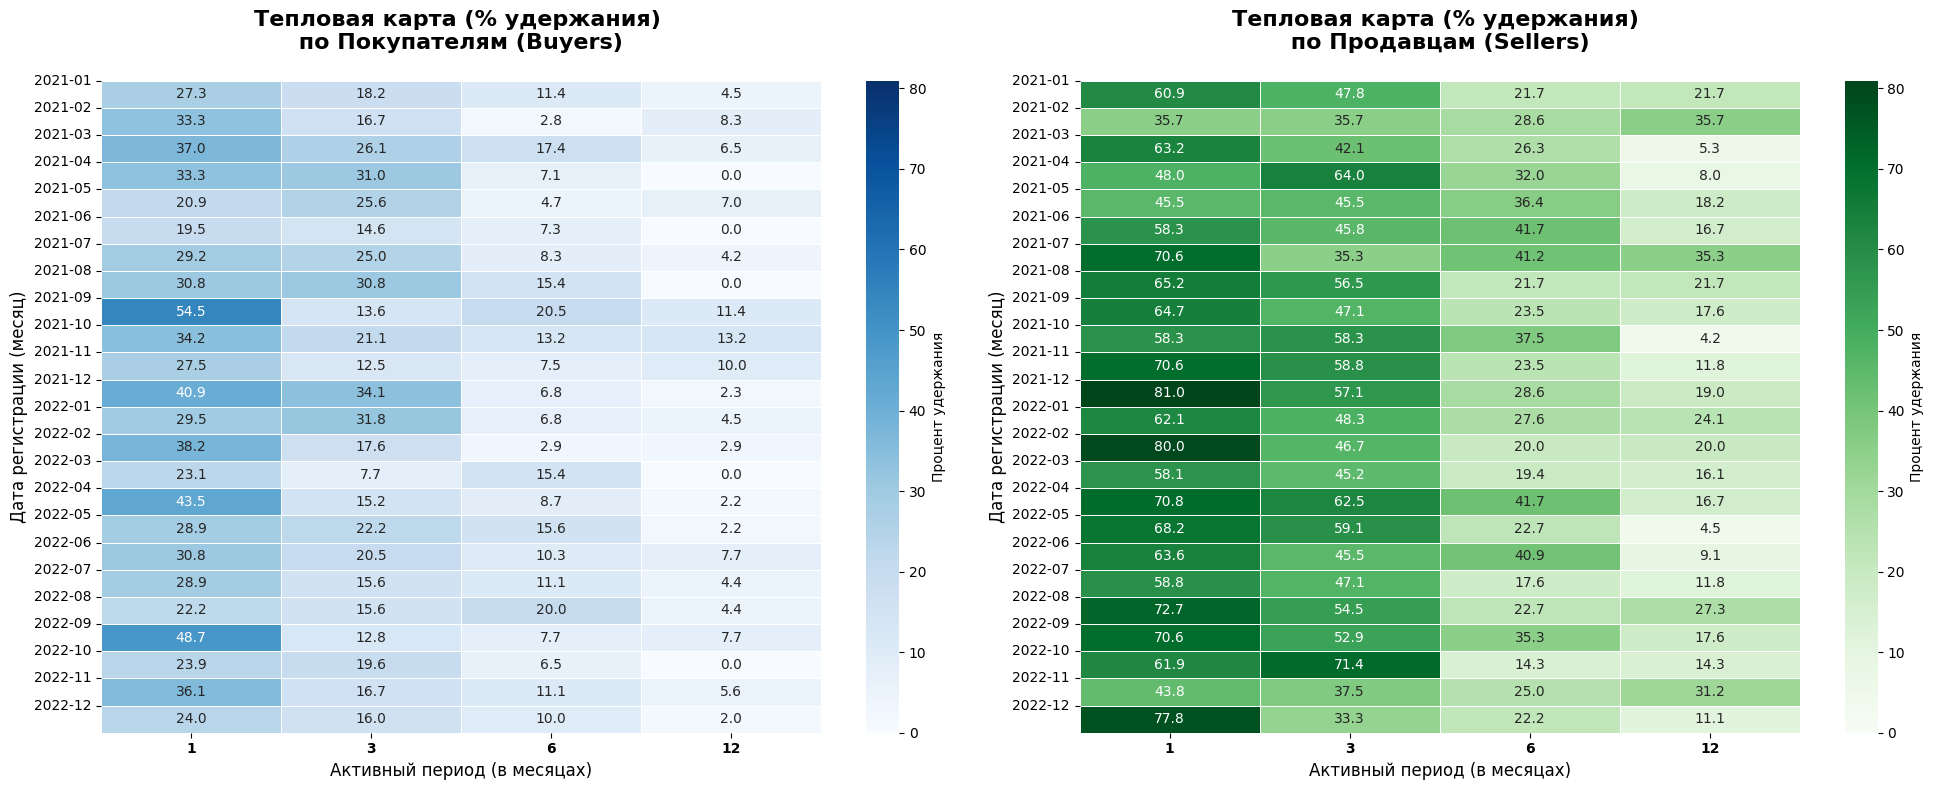

In [ ]:
def plot_cohort_heatmaps_side_by_side(buyer_cohort, seller_cohort):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Убрали sharey=True

    # Устанавливаем общий диапазон для цветовой шкалы
    min_value = min(buyer_cohort.min().min(), seller_cohort.min().min())
    max_value = max(buyer_cohort.max().max(), seller_cohort.max().max())

    # Покупатели
    sns.heatmap(
        buyer_cohort,
        annot=True,
        fmt=".1f",
        cmap="Blues",
        linewidths=0.5,
        ax=axes[0],
        vmin=min_value,
        vmax=max_value,
        cbar_kws={'label': 'Процент удержания'}
    )
    axes[0].set_title("Тепловая карта (% удержания) \n по Покупателям (Buyers) \n", fontsize=16, fontweight='bold')
    axes[0].set_ylabel("Дата регистрации (месяц)", fontsize=12)
    axes[0].set_xlabel("Активный период (в месяцах)", fontsize=12)
    axes[0].set_yticks(range(len(buyer_cohort.index)))
    axes[0].set_yticklabels(buyer_cohort.index.strftime('%Y-%m'), rotation=0)  # Метки оси Y
    axes[0].set_xticklabels(buyer_cohort.columns, fontweight="bold")  # Жирный шрифт на X

    # Продавцы
    sns.heatmap(
        seller_cohort,
        annot=True,
        fmt=".1f",
        cmap="Greens",
        linewidths=0.5,
        ax=axes[1],
        vmin=min_value,
        vmax=max_value,
        cbar_kws={'label': 'Процент удержания'}
    )
    axes[1].set_title("Тепловая карта (% удержания) \n по Продавцам (Sellers) \n", fontsize=16, fontweight='bold')
    axes[1].set_ylabel("Дата регистрации (месяц)", fontsize=12)
    axes[1].set_xlabel("Активный период (в месяцах)", fontsize=12)
    axes[1].set_yticks(range(len(seller_cohort.index)))
    axes[1].set_yticklabels(seller_cohort.index.strftime('%Y-%m'), rotation=0)  # Метки оси Y
    axes[1].set_xticklabels(seller_cohort.columns, fontweight="bold")  # Жирный шрифт на X

    plt.tight_layout()
    plt.show()

# Построение тепловых карт
plot_cohort_heatmaps_side_by_side(buyer_cohort, seller_cohort)


## 3 . Статистический анализ данных по кагорте

In [ ]:
def cohort_statistics(cohort):
    """
    Функция для расчета статистических данных по когорте:
    среднее, медиана, процент удержания на каждом этапе.
    """
    stats = pd.DataFrame({
        "Среднее (%)": cohort.mean(),
        "Медиана (%)": cohort.median(),
        "Макс. удержание (%)": cohort.max(),
        "Мин. удержание (%)": cohort.min()
    })
    stats["Процент когорты, достигшей этапа (%)"] = cohort.notnull().mean() * 100
    return stats

# Расчет статистики для покупателей и продавцов
buyer_stats = cohort_statistics(buyer_cohort)
seller_stats = cohort_statistics(seller_cohort)

# Вывод статистики
print("Статистика когортного анализа покупателей:")
print(buyer_stats)
print("\nСтатистика когортного анализа продавцов:")
print(seller_stats)


Статистика когортного анализа покупателей:
                 Среднее (%)  Медиана (%)  Макс. удержание (%)  \
activity_period                                                  
1                  31.928607    30.157343            54.545455   
3                  20.017750    17.914439            34.090909   
6                  10.349177     9.347826            20.454545   
12                  4.627084     4.444444            13.157895   

                 Мин. удержание (%)  Процент когорты, достигшей этапа (%)  
activity_period                                                            
1                         19.512195                                 100.0  
3                          7.692308                                 100.0  
6                          2.777778                                 100.0  
12                         0.000000                                 100.0  

Статистика когортного анализа продавцов:
                 Среднее (%)  Медиана (%)  Макс. удержание (%)

## 4 . Выводы и рекомендации по кагортному анализу

#### 1. **Покупатели (Buyer Cohort Analysis)**:
- **Средний процент удержания:**
  - Удержание покупателей на 1-й месяц составляет 31.93%, но сильно падает с течением времени: на 12-й месяц удержание падает до 4.63%.
  - Среднее удержание за 12 месяцев — всего 4.63%, что указывает на значительный спад активности пользователей с каждым месяцем.

- **Максимальное удержание:**
  - Максимальное удержание на 1-й месяц составляет 54.55%, но падает до 13.16% на 12-й месяц. Это также подтверждает ухудшение удержания пользователей в долгосрочной перспективе.

- **Процент когорты, достигшей этапа:**
  - Для всех периодов (1, 3, 6, 12 месяцев) процент пользователей, достигших соответствующего этапа, составляет 100%, что говорит о том, что когорта в целом не теряет пользователей в процессе анализа (на каждом этапе активных пользователей всегда было 100%).

**Рекомендации для покупателей:**
- **Удержание и вовлеченность:** Снижение удержания пользователей с течением времени может быть связано с отсутствием постоянного вовлечения и мотивации. Необходимо сосредоточиться на:
  1. Повышении активности пользователей через рассылки, персонализированные предложения и акции.
  2. Разработке программы лояльности или бонусов для активных пользователей, чтобы стимулировать их возвращение на платформу.
  3. Улучшении пользовательского опыта для увеличения вовлеченности, например, через улучшение интерфейса или персонализированные рекомендации товаров.

- **Улучшение конверсии:** Снижение активности на более поздних этапах также говорит о том, что нужно больше внимания уделить конверсии пользователей в реальные покупки и повышению их ценности.

#### 2. **Продавцы (Seller Cohort Analysis):**
- **Средний процент удержания:**
  - Удержание продавцов на 1-й месяц составляет 62.93%, но также падает с течением времени: на 12-й месяц оно снижается до 17.46%. Это подтверждает тенденцию утраты продавцов со временем.

- **Максимальное удержание:**
  - Максимальное удержание на 1-й месяц составляет 80.95%, но с течением времени оно падает до 35.71%. Это также подтверждает существенное снижение удержания продавцов на платформе.

- **Процент когорты, достигшей этапа:**
  - Для всех периодов (1, 3, 6, 12 месяцев) процент продавцов, достигших соответствующего этапа, составляет 100%, что аналогично ситуации с покупателями: это говорит о том, что анализируется активность всех продавцов, без пропусков.

**Рекомендации для продавцов:**
- **Удержание и вовлеченность:** Снижение удержания продавцов также является ключевым фактором. Рекомендации для повышения удержания:
  1. Снижение уровня оттока продавцов с помощью предложений по улучшению их бизнес-результатов, таких как маркетинговая поддержка, персонализированные рекомендации по продажам, улучшение видимости товаров на платформе.
  2. Разработка более выгодных условий для продавцов, которые используют платные инструменты продвижения или подписку.
  3. Развитие долгосрочных отношений с продавцами через регулярное обучение, а также создание сообщества для обмена опытом и развития бизнеса.

- **Оптимизация затрат и доходов:** Поддержка продавцов в увеличении их доходности через внедрение новых функций или предложений от маркетплейса может способствовать улучшению их удержания и результативности.


## 5 . Проблемы и решения:

1. **Низкое удержание покупателей и продавцов:**
   - **Проблема:** Спад удержания пользователей и продавцов после первого месяца. Это может быть вызвано недостаточной мотивацией продолжать использовать платформу.
   - **Решение:** Внедрение программ лояльности, регулярные акции, улучшение клиентского сервиса и увеличение вовлеченности через персонифицированные предложения.

2. **Отток продавцов:**
   - **Проблема:** Продавцы теряются на более поздних этапах (особенно на 6-12 месяце). Это может быть вызвано отсутствием интереса к долгосрочной работе с платформой.
   - **Решение:** Повышение привлекательности условий для продавцов (например, улучшение условий по комиссионным сборам, внедрение специальных предложений, поддержка с использованием продвинутых маркетинговых инструментов).

3. **Снижение активности покупателей:**
   - **Проблема:** Падение активности покупателей с течением времени.
   - **Решение:** Увеличение вовлеченности через улучшение рекомендаций товаров, внедрение персонализированных предложений и скидок, улучшение юзабилити сайта, чтобы сделать покупательский процесс удобным и быстрым.

4. **Неэффективность долгосрочных отношений с покупателями и продавцами:**
   - **Проблема:** Платформа теряет пользователей и продавцов со временем.
   - **Решение:** Внедрение программ долгосрочного сотрудничества, такие как скидки на подписку, специальные предложения и дополнительные бонусы за активность и продажи.

**Общий вывод:**
Для повышения общей эффективности бизнеса на платформе важно работать над улучшением удержания и вовлеченности как покупателей, так и продавцов, внедряя программы лояльности, поддерживающие инструменты продвижения и персонализированные предложения.

# Раздел 4: Итоговые выводы и рекомендации по юнит-экономике маркетплейса

#### **Общие выводы:**

1. **Низкая рентабельность привлечения покупателей**:
   - Отрицательный ROI для покупателей (-19.50%) указывает на убыточность привлечения клиентов. Проблема связана с невысокой LTV и высокими затратами на привлечение (CAC).

2. **Низкое удержание покупателей**:
   - Удержание покупателей на платформе остаётся низким (20%), что приводит к высоким затратам на привлечение новых клиентов и необходимость повышения качества клиентского опыта для их возвращения.

3. **Невысокая монетизация продавцов**:
   - Хотя ROI продавцов высокий (1303.04%), большая часть продавцов не использует дополнительные платные инструменты (подписки и продвижение), что свидетельствует о недоиспользованном потенциале дополнительных доходов.

4. **Высокий отток продавцов**:
   - Продавцы теряются в процессе работы на платформе: удержание на уровне 40% означает, что значительная часть продавцов не генерирует дополнительный доход, а значит, пропущен потенциал роста.

5. **Операционные расходы на обслуживание продавцов**:
   - Высокие операционные расходы на каждого продавца (1000 руб./мес.) при низком уровне удержания увеличивают нагрузку на платформу и снижают её рентабельность.

6. **Когортный анализ показывает спад активности**:
   - Снижение удержания среди как покупателей, так и продавцов с течением времени, особенно на 6 и 12 месяце, говорит о необходимости работы над долгосрочными стратегиями удержания.

#### **Рекомендации:**

1. **Оптимизация CAC и увеличение LTV покупателей**:
   - **Снижение CAC**: Пересмотреть маркетинговую стратегию, акцентировать внимание на более дешевых каналах привлечения (реферальные программы, органический трафик).
   - **Увеличение LTV**: Внедрить программы лояльности, персонализированные предложения и рекомендации товаров, чтобы увеличить средний чек и срок удержания.

2. **Оптимизация монетизации продавцов**:
   - **Увеличение использования подписок**: Предложить гибкие тарифы и бесплатные пробные периоды для привлечения новых пользователей к платным подпискам.
   - **Повышение дохода от продвижения**: Разработать программы для повышения вовлеченности продавцов в платные инструменты продвижения.

3. **Удержание продавцов**:
   - Предоставление качественной поддержки и обучение для продавцов, а также внедрение специальных бонусов и скидок для активных продавцов.
   - Внедрение постоянного мониторинга и анализа потребностей продавцов для улучшения их взаимодействия с платформой.

4. **Снижение операционных затрат**:
   - Использование автоматизации процессов (например, чат-ботов) и оптимизация серверных мощностей для снижения затрат на обслуживание продавцов и покупателей.

5. **Повышение удержания**:
   - Для продавцов: улучшение условий работы и поддержка на каждом этапе их развития на платформе.
   - Для покупателей: разработка стратегий, направленных на возвращение ушедших клиентов через акции, персонализированные предложения и улучшение клиентского опыта.

#### **Итог**:
Основной задачей является увеличение доходов от существующих пользователей (покупателей и продавцов) через улучшение удержания и монетизации, а также снижение затрат на привлечение. Это поможет стабилизировать финансовые потоки платформы и повысить её рентабельность.